In [1]:
from custom_functions import get_tiles
from os import listdir
from matplotlib import pyplot as plt
from img_tuiles import TUILES as IMG_TILES
from tuiles import TILE_LABELS
from sklearn import tree
from sklearn.model_selection import train_test_split
import pickle

import cv2 as cv
import numpy as np
import pandas as pd

['mysteres01.jpg', 'mysteres02.jpg', 'mysteres03.jpg', 'mysteres04.jpg', 'mysteres05.jpg', 'mysteres06.jpg', 'mysteres07.jpg', 'mysteres08.jpg', 'mysteres09.jpg', 'mysteres10.jpg', 'mysteres11.jpg', 'mysteres12.jpg', 'mysteres13.jpg', 'mysteres14.jpg', 'mysteres15.jpg']


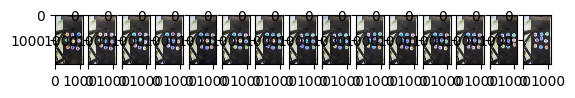

In [2]:
# Retrieve every jpg images in the ./images repository
files = listdir("./images")
images = sorted([file for file in files if file.endswith(".jpg")])
print(images)

cv_images_hd = [cv.imread("./images/" + image) for image in images]
# cv_images_hd = [cv.imread("./images/mysteres1.jpg")]
cv_images_sd = [cv.resize(image, (image.shape[1] // 2, image.shape[0] // 2)) for image in cv_images_hd]
cv_images_rgb = [cv.cvtColor(image, cv.COLOR_BGR2RGB) for image in cv_images_sd]

# Iterate through the image to display them on a row
for i, image in enumerate(cv_images_sd):
    plt.subplot(1, len(cv_images_sd), i + 1)
    plt.imshow(image)

In [3]:
cv_images_tiles = [get_tiles(image) for image in cv_images_rgb]
cv_images_tiles

[[<tile.Tile at 0x7fc0801ddf90>,

In [4]:
for i, tiles in enumerate(cv_images_tiles):
    img_id = "M" + str(i + 1)
    tile_ids = IMG_TILES[img_id]
    
    for (id, tile) in zip(tile_ids, tiles):
        tile.with_tile_id(TILE_LABELS[id]).with_img_id(img_id)
        print(tile)

Tile: {[494 820  75], (106.40062270025474, 100.78431927540333, 225.21330314180582), 0, CHANSON_OU_MUSIQUE, M1}
Tile: {[706 836  76], (169.0097199977909, 59.55453793103448, 221.57257931034482), 1, LIVRE, M1}
Tile: {[964 814  77], (12.843817320120637, 126.46960494490729, 226.78097285675892), 2, FILM_OU_TV, M1}
Tile: {[ 486 1048   74], (34.54695231996274, 102.04694589877836, 201.2108416215902), 3, LIEU, M1}
Tile: {[ 728 1096   76], (88.73283202477054, 60.5623929735403, 200.2783448275862), 4, MATIERE, M1}
Tile: {[ 960 1074   77], (157.2900965011591, 26.70495592345732, 203.43026068261221), 5, LOISIR, M1}
Tile: {[ 516 1332   75], (114.75567506368526, 116.96365694876876, 203.39824511746392), 6, NOMBRE_OU_DATE, M1}
Tile: {[ 710 1342   75], (20.343739079790332, 113.97696009057458, 228.62541749221626), 7, PERSONNAGE_CELEBRE, M1}
Tile: {[ 914 1386   76], (138.7495724137931, 60.92093793103448, 194.38383448275863), 8, PERSONNAGE_COMMUN, M1}
Tile: {[494 820  75], (104.11129361123697, 68.339695304978

In [5]:
# Flatten cv_images_tiles
cv_images_tiles_flatten = [tile for tiles in cv_images_tiles for tile in tiles]
cv_images_tiles_flatten

In [6]:
# Create a dataframe with the tiles data as columns [hue, saturation, value, position_x, position_y, radius, tile_id]
# As each tiles are objects, we need to extract the data from each object
data = [[tile.color[0], tile.color[1], tile.color[2], tile.dimensions[0], tile.dimensions[1], tile.dimensions[2], tile.tile_id, tile.img_id] for tile in cv_images_tiles_flatten]
data

[[106.40062270025474,
  100.78431927540333,
  225.21330314180582,
  494,
  820,
  75,
  'CHANSON_OU_MUSIQUE',
  'M1'],
 [169.0097199977909,
  59.55453793103448,
  221.57257931034482,
  706,
  836,
  76,
  'LIVRE',
  'M1'],
 [12.843817320120637,
  126.46960494490729,
  226.78097285675892,
  964,
  814,
  77,
  'FILM_OU_TV',
  'M1'],
 [34.54695231996274,
  102.04694589877836,
  201.2108416215902,
  486,
  1048,
  74,
  'LIEU',
  'M1'],
 [88.73283202477054,
  60.5623929735403,
  200.2783448275862,
  728,
  1096,
  76,
  'MATIERE',
  'M1'],
 [157.2900965011591,
  26.70495592345732,
  203.43026068261221,
  960,
  1074,
  77,
  'LOISIR',
  'M1'],
 [114.75567506368526,
  116.96365694876876,
  203.39824511746392,
  516,
  1332,
  75,
  'NOMBRE_OU_DATE',
  'M1'],
 [20.343739079790332,
  113.97696009057458,
  228.62541749221626,
  710,
  1342,
  75,
  'PERSONNAGE_CELEBRE',
  'M1'],
 [138.7495724137931,
  60.92093793103448,
  194.38383448275863,
  914,
  1386,
  76,
  'PERSONNAGE_COMMUN',
  'M1']

In [7]:
df = pd.DataFrame(data, columns=["hue", "saturation", "value", "position_x", "position_y", "radius", "tile_id", "img_id"])
df.head()

,hue,saturation,value,position_x,position_y,radius,tile_id,img_id
0,106.400623,100.784319,225.213303,494,820,75,CHANSON_OU_MUSIQUE,M1
1,169.009720,59.554538,221.572579,706,836,76,LIVRE,M1
2,12.843817,126.469605,226.780973,964,814,77,FILM_OU_TV,M1
3,34.546952,102.046946,201.210842,486,1048,74,LIEU,M1
4,88.732832,60.562393,200.278345,728,1096,76,MATIERE,M1


In [8]:
clf = tree.DecisionTreeClassifier()
X = df[["hue", "saturation", "value"]]
Y = df[['tile_id']]

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
predicted = clf.predict(X_test)
print(predicted)
print(Y_test)

['CHANSON_OU_MUSIQUE' 'OBJECT' 'LOISIR' 'CONCEPT' 'LOISIR' 'ANIMAL' 'LIEU'
 'PERSONNAGE_COMMUN' 'NOMBRE_OU_DATE' 'LIEU' 'NOMBRE_OU_DATE'
 'CHANSON_OU_MUSIQUE' 'OBJECT' 'VERBE' 'LIEU' 'FORME_OU_COULEUR' 'MATIERE'
 'MATIERE' 'OBJECT' 'LIVRE' 'FORME_OU_COULEUR' 'CHANSON_OU_MUSIQUE'
 'PERSONNAGE_CELEBRE' 'OBJECT' 'LIVRE' 'CONCEPT' 'OBJECT']
                tile_id
98   CHANSON_OU_MUSIQUE
67               OBJECT
105              LOISIR
19              CONCEPT
42               LOISIR
62               ANIMAL
12                 LIEU
110   PERSONNAGE_COMMUN
125      NOMBRE_OU_DATE
128                LIEU
44   CHANSON_OU_MUSIQUE
40   CHANSON_OU_MUSIQUE
27               OBJECT
100               VERBE
119                LIEU
31     FORME_OU_COULEUR
51              MATIERE
4               MATIERE
84               OBJECT
81                LIVRE
85     FORME_OU_COULEUR
26   CHANSON_OU_MUSIQUE
16   PERSONNAGE_CELEBRE
18               OBJECT
10                LIVRE
111             CONCEPT
45           

In [12]:
s = pickle.dumps(clf)
with open("./model/mysteres01.pkl", "wb") as file:
    file.write(s)